In [1]:
#Comment out the streamlit part.
#Specify some numbers instead of user input

#import streamlit as st
# To make things easier later, we're also importing numpy and pandas for
# working with sample data.
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
color = sb.color_palette()
import matplotlib as mpl
import pickle

from sklearn import preprocessing as pp 
#import the entire linear model
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr 
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
#from sklearn.preprocessing import PolynomialFeatures

from scipy.stats import wilcoxon

from sklearn.linear_model import LogisticRegressionCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score




Using TensorFlow backend.
/home/akira/anaconda3/envs/unsupervisedLearning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/akira/anaconda3/envs/unsupervisedLearning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/akira/anaconda3/envs/unsupervisedLearning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint1

In [2]:

#title of the app
#st.title('Estimating targets for reducing employee turnover')

#st.header("Results from 1000 repetition of Lasso regression")

# Getting back the objects:
with open('lasso_output.pickle', 'rb') as f:  
    test_r_squared, lasso_alpha, lasso_coef = pickle.load(f)

# Getting back the objects:
with open('scaler.pickle', 'rb') as f:  
    scalerEmployeeResponse, scalerOccupancyTurnover = pickle.load(f)

with open('original_values.pickle', 'rb') as f:  
    TurnOver2, dataX2 = pickle.load(f)


#loading the dataframe
feature_set = pd.read_pickle("./feature_set.pkl")
turnOverRate = pd.read_pickle("./turnOverRate.pkl")
LocationCodeComprehensive = pd.read_pickle("./LocationCodeComprehensive.pkl")
location_pay = pd.read_pickle("./location_pay.pkl")
location_sd = pd.read_pickle("./location_sdS_df.pkl")
lasso_r_squared_df = pd.read_pickle("./lasso_r_squared_1000.pkl")
lasso_alpha_df = pd.read_pickle("./lasso_alpha_1000.pkl")
lasso_coef_df = pd.read_pickle("./lasso_coef_1000.pkl")

#Rename the column
LocationCodeComprehensive.rename(columns = {'Unnamed: 2':'location code'}, inplace = True) 



0      5015
1      5020
2      5021
3      5022
4      5023
       ... 
252    5946
253    5947
254    5948
255    5906
256    5907
Length: 257, dtype: int64

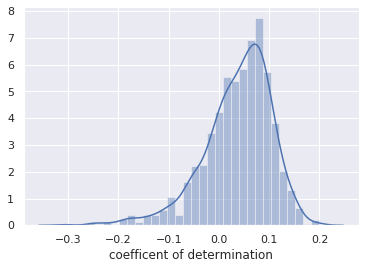

In [3]:
#plot the ditribution of the coefficent of determination
test_r_squared_df=pd.DataFrame(data=test_r_squared)
test_r_squared_df.rename(columns = {0:'coefficient of determination'}, inplace = True) 
sb.distplot(test_r_squared_df,axlabel='coefficent of determination')
sb.despine()
#st.pyplot()


Text(0.5, 1.0, 'average weight for each feature')

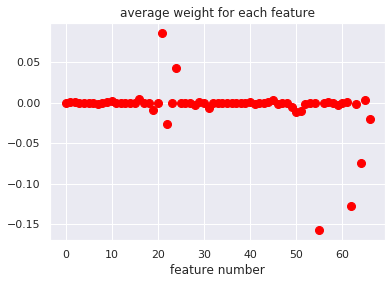

In [4]:

#Calculate mean and plot
mean_coef=lasso_coef_df.mean()
plt.plot(mean_coef,linestyle='none',marker='o',markersize=8,color='red') 
plt.xlabel('feature number')
#plt.ylabel('average weight for each feature')
plt.title('average weight for each feature')
#st.pyplot()


In [5]:

#Chose top coefficients.
abs_mean_coef=abs(mean_coef)
top_coef=abs_mean_coef.sort_values(ascending=False)

all_features = pd.concat([feature_set,location_pay,location_sd], axis = 1)




In [32]:
#Side bar with choice of location
#location = st.sidebar.selectbox(
#    'Select your location',
#     LocationCodeComprehensive)
#Side bar with choice of number of features 
#NofFeatures = st.sidebar.slider(
#    'Number of features to use',
#    0, 65, (3))

#Side bar with choice of number of training 
#NofTraining = st.sidebar.slider(
#    'Number of training (linear regression with interaction)',
#    1, 1000, (300))

#Side bar with choice for the percentage reduction in turnover rate 
#percent_turnover = st.sidebar.slider(
#    'turnover reduction goal (%)',
#    1, 100, (10))

#Specific for Jupyter notebook. specify the user inputs
location = LocationCodeComprehensive[5]
NofFeatures = 3
NofTraining = 300
percent_turnover = 10

#'Current location:', location
#'Number of features to use:', NofFeatures
#'Training number:', NofTraining
#'Reducing turn over by (%):', percent_turnover



In [41]:
#run linear regression with the chosen number of figures and plot all the data point against the predicted values for that data.

#Choose the features with top n coefficients 
features_number = NofFeatures
selected_features = all_features.iloc[:,top_coef.index[0]]

for features in range(features_number-1):
    selected_features = pd.concat([selected_features, all_features.iloc[:,top_coef.index[features+1]]], axis = 1)

#Show features and questions.
#This iteration has hard coded text (results are already known).

#st.header("Top 5 features by average absolute weight")

#Reduce the significant digits to 2.
#mean_coef_reduced = top_coef[0:5].apply(lambda x: round(x, 2 - int(np.floor(np.log10(abs(x))))))
#st.subheader("55: Provide excellent service")
#st.subheader('absolute value of mean coefficient:')
#st.write(mean_coef_reduced[55])

#st.subheader("62: Chef's tenure")
#st.write(mean_coef_reduced[62])

#st.subheader("21: Managers avoid playing favorites")
#st.write(mean_coef_reduced[21])

#st.subheader("64: Office Manager's tenure")
#st.write(mean_coef_reduced[64])

#st.subheader("24: People given a lot of responsibility")
#st.write(mean_coef_reduced[24])

#incorporate interaction terms
poly = pp.PolynomialFeatures(interaction_only=True,include_bias = False)
selected_features_interaction=poly.fit_transform(selected_features)
selected_features_interaction=pd.DataFrame(data=selected_features_interaction)
selected_features_interaction.head(10)



,0,1,2,3,4,5
0,0.467229,-1.180298,1.103600,-0.551469,0.515634,-1.302577
1,-1.504403,-1.045167,-0.092121,1.572352,0.138588,0.096282
2,0.888779,0.775737,-0.562840,0.689458,-0.500240,-0.436616
3,-0.026882,-0.108571,-0.092121,0.002919,0.002476,0.010002
4,0.679443,-0.224316,-1.280074,-0.152410,-0.869737,0.287141
5,0.147224,-0.073625,0.954911,-0.010839,0.140586,-0.070305
6,-0.722633,0.888745,-0.854913,-0.642237,0.617788,-0.759800
7,-1.234217,0.051929,-1.190831,-0.064092,1.469744,-0.061839
8,0.106387,0.231249,1.243807,0.024602,0.132325,0.287629
9,-0.355472,0.808273,-0.340024,-0.287318,0.120869,-0.274832


In [8]:
#make a model with interactions.
#Run N times and take the average.
#Try to use the shuffle split function => later
x_linear = selected_features_interaction
y_linear = turnOverRate #Turn over

train_number = NofTraining
#Run this part for selected number of times and get the values for r-squared, alpha, and the weights.
#reg.alpha_, reg.coef_, r2score.

#initialize
linear_r_squared = np.zeros((train_number,1))
linear_coef = np.zeros((train_number,x_linear.shape[1]))

for trialNo in range(train_number):
    
    #split 80-20
    Xl_train, Xl_test, Yl_train, Yl_test = train_test_split(x_linear, y_linear, test_size=0.2)
    

    linear_reg = linear_model.LinearRegression()
    linear_reg.fit(Xl_train,Yl_train)
    
    
    Ypredl = linear_reg.predict(Xl_test)
    
    linear_r_squared[trialNo] = r2_score(Yl_test, Ypredl)
    linear_coef[trialNo,:] = linear_reg.coef_

#st.header("Results from linear regression with interaction")

#Plot the distribution.
#linear_r_squared_df=pd.DataFrame(data=linear_r_squared)
#linear_r_squared_df.hist()
#sb.distplot(linear_r_squared_df, axlabel='coefficent of determination')
#sb.despine()
#st.pyplot()



Text(0.5, 1.0, 'average weight for each feature/interaction')

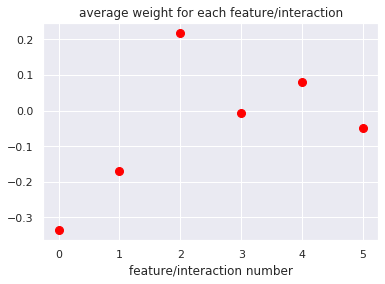

In [9]:

#Calculate mean and plot
linear_coef_df = pd.DataFrame(data=linear_coef)
mean_linear_coef=linear_coef_df.mean()
plt.plot(mean_linear_coef,linestyle='none',marker='o',markersize=8,color='red') 
plt.xlabel('feature/interaction number')
#plt.ylabel('average weight for each feature')
plt.title('average weight for each feature/interaction')
#st.pyplot()



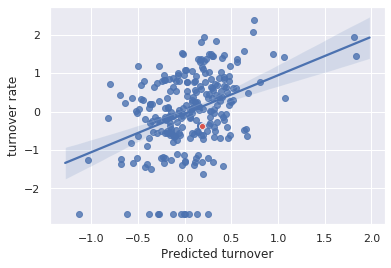

In [10]:

#st.subheader("Predicted turnover rate vs actual turnover rate")
#Calculate the prediction with the average model and plot the actual vs the prediction.
#Highlight the current location.
PredictionMatrix=x_linear.multiply(mean_linear_coef)
PredictionValue=PredictionMatrix.sum(axis=1)
#Have 1 only for the current location
index = LocationCodeComprehensive==location
#Put together into a single data frame so we can plot easier
frameMVP = { 'turnover rate': turnOverRate, 'Predicted turnover': PredictionValue} 
dataForPlotMVP = pd.DataFrame(frameMVP)

fig, ax = plt.subplots()
#plot the regression line and all the data
sb.regplot(x='Predicted turnover', y='turnover rate', data=dataForPlotMVP, ax = ax)
#just for the current location
frameMVP2 = { 'turnover rate': turnOverRate[index], 'Predicted turnover': PredictionValue[index]} 
dataForPlotMVP2 = pd.DataFrame(frameMVP2)
sb.scatterplot(x='Predicted turnover', y='turnover rate', data=dataForPlotMVP2, color=sb.xkcd_rgb["pale red"], ax = ax)
#st.pyplot()




In [67]:
#User chose how much to reduce figure out how much do we need to reduce in the log transformed scaled unit.
TurnOver2=TurnOver2.reset_index(drop=True)
#reset row index
dataX2=dataX2.reset_index(drop=True)
#and the column names.
dataX2.columns = range(dataX2.shape[1])

base_turnover=TurnOver2[index]
new_turnover = base_turnover*(1-(percent_turnover/100))
log_new_turnover = np.log(new_turnover+0.1)
scaled_turnover = (log_new_turnover-scalerOccupancyTurnover.mean_[1])/scalerOccupancyTurnover.scale_[1]

current_turnover = turnOverRate[index]
turnover_change = scaled_turnover-current_turnover
#currently assumes we use the top component and have selected 3 features. We need find the correct coefficents for other cases automatically.
#I think if we chose top component, the coef we need are [0] and interaction terms are [number of components] to [number of components + number of components-2] we also need to multiply each components wih the other features.
#feature_change = turnover_change/(mean_linear_coef[0]+mean_linear_coef[3]+mean_linear_coef[4])
feature_change = turnover_change/(mean_linear_coef[0]+mean_linear_coef[3]*selected_features_interaction.loc[LocationCodeComprehensive==location,1]+mean_linear_coef[4]*selected_features_interaction.loc[LocationCodeComprehensive==location,2])

#bring it back to what it means in the raw data scale. The raw value of the feature has to be between 0 and 1.
#new_feature = selected_features.loc[LocationCodeComprehensive==location,55]+feature_change
new_feature = selected_features_interaction.loc[LocationCodeComprehensive==location,0]+feature_change

new_feature_before_scale = (new_feature*scalerEmployeeResponse.scale_[55])+scalerEmployeeResponse.mean_[55]
new_feature_before_transform = 1.1-np.exp(0.1-new_feature_before_scale)
current_feature = dataX2.loc[LocationCodeComprehensive==location,55]
#feature_change = new_feature_before_transform - current_feature

#st.subheader("Current score for the (Q55: Provide excellent service)")
#st.write(round(current_feature[0], 2 - int(np.floor(np.log10(abs(current_feature[0]))))))
#st.subheader("target score to achieve the turnover goal")
#st.write(round(new_feature_before_transform[0], 2 - int(np.floor(np.log10(abs(new_feature_before_transform[0]))))))


In [68]:
test1=np.log(1.1-current_feature)
test1

5   -1.285651
Name: 55, dtype: float64

In [69]:
test2=0.1-test1
test2

5    1.385651
Name: 55, dtype: float64

In [70]:
test3=(test2-scalerEmployeeResponse.mean_[55])/scalerEmployeeResponse.scale_[55]
test3

5    0.147224
Name: 55, dtype: float64